Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [1]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt



In [3]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 40

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


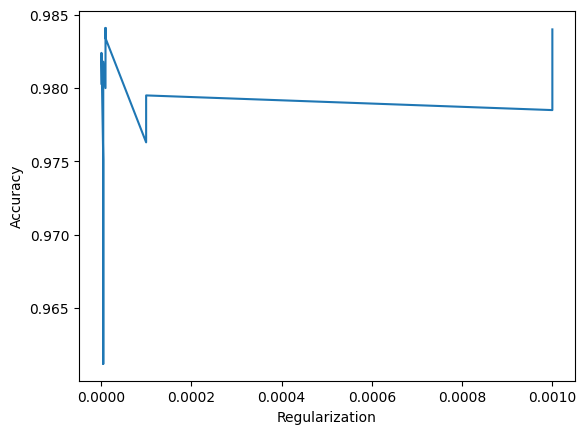

In [9]:
acc = [0.984000027179718, 0.9787999987602234, 0.9785000085830688, 0.9794999957084656, 0.977400004863739, 0.9763000011444092, 0.9833999872207642, 0.9840999841690063, 0.9800000190734863, 0.9818000197410583, 0.9611999988555908, 0.9750999808311462, 0.9824000000953674, 0.98089998960495, 0.9803000092506409]
reg = [0.001, 0.001, 0.001, 0.0001, 0.0001, 0.0001, 0.00001, 0.00001, 0.00001, 0.000005, 0.000005, 0.000005, 0.000001, 0.000001, 0.000001]
plt.plot(reg, acc)
plt.xlabel('Regularization')
plt.ylabel('Accuracy')
plt.show()


In [8]:

## Define model ##
model = Sequential()

reg = [0.001, 0.0001, 0.00001, 0.000005, 0.000001]
acc = []
duplicates = 3

for i in range(3, 4):
                model.add(Flatten())
                model.add(Dense(500, activation = 'relu', activity_regularizer=tensorflow.keras.regularizers.l2(reg[i])))
                model.add(Dense(300, activation = 'relu', activity_regularizer=tensorflow.keras.regularizers.l2(reg[i])))
                model.add(Dense(num_classes, activation='softmax'))


                model.compile(loss=keras.losses.categorical_crossentropy,
                        optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
                        metrics=['accuracy'],)

                fit_info = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))
                score = model.evaluate(x_test, y_test, verbose=0)
                print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
                acc.append(score[1])
print(acc)

Epoch 1/40
469/469 [==============================] - 4s 7ms/step - loss: 0.4000 - accuracy: 0.8897 - val_loss: 0.2196 - val_accuracy: 0.9356
Epoch 2/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1912 - accuracy: 0.9450 - val_loss: 0.1639 - val_accuracy: 0.9528
Epoch 3/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1407 - accuracy: 0.9604 - val_loss: 0.1265 - val_accuracy: 0.9629
Epoch 4/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1104 - accuracy: 0.9683 - val_loss: 0.1102 - val_accuracy: 0.9666
Epoch 5/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0910 - accuracy: 0.9743 - val_loss: 0.0961 - val_accuracy: 0.9713
Epoch 6/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0763 - accuracy: 0.9788 - val_loss: 0.0951 - val_accuracy: 0.9713
Epoch 7/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0655 - accuracy: 0.9818 - val_loss: 0.0863 - val_accuracy: 0.9733
Epoch 